In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

C:\Users\minseok\AppData\Local\Temp/ipykernel_14580/3712437291.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


In [2]:
# Visualization setup
%matplotlib
from matplotlib import pyplot as plt
import seaborn; seaborn.set()  # set plot styles
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = [10, 5]
plt.ion() # enable the interactive mode

Using matplotlib backend: Qt5Agg


In [5]:
# Visualize the 'CO(GT)' variable
df['CO(GT)'].plot()

<AxesSubplot:xlabel='Datetime'>

In [2]:
# Linear interpolation
co = df['CO(GT)'].copy()
co.interpolate(inplace=True)

In [7]:
# Visualize original and imputed data
plt.plot(df['CO(GT)'], label='original', zorder=2)
plt.plot(co, label='linear interpolation', zorder=1)
plt.legend(loc='best')

In [8]:
# Detecting outliers using Boxplot
plt.boxplot(co)
plt.title("Detecting ouliers using Boxplot")
plt.xlabel('CO(GT)')

Text(0.5, 0, 'CO(GT)')

In [3]:
# Calculate correlations between variables
corr_matrix = df.corr()
corr_matrix

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
CO(GT),1.000000,0.877203,0.914973,0.792557,-0.701703,0.679262,0.639470,0.851403,0.040218,0.065809,0.845144
PT08.S1(CO),0.877203,1.000000,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.114606,0.135324,0.883795
PT08.S2(NMHC),0.914973,0.892964,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,-0.090380,0.186933,0.981950
NOx(GT),0.792557,0.713654,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,0.221032,-0.149323,0.626638
PT08.S3(NOx),-0.701703,-0.771938,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.056740,-0.232017,-0.735744
NO2(GT),0.679262,0.641529,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.091759,-0.335022,0.544039
PT08.S4(NO2),0.639470,0.682881,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,-0.032188,0.629641,0.765731
PT08.S5(O3),0.851403,0.899324,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,0.124956,0.070751,0.865689
RH,0.040218,0.114606,-0.090380,0.221032,-0.056740,-0.091759,-0.032188,0.124956,1.000000,0.167971,-0.061681
AH,0.065809,0.135324,0.186933,-0.149323,-0.232017,-0.335022,0.629641,0.070751,0.167971,1.000000,0.167972


In [4]:
# Choose the least correlated variable
rh = df['RH'].copy().interpolate() # Relative Humidity

In [12]:
# Visualize a scatter plot(CO, RH)
plt.scatter(co, rh, s=12, c='black')
plt.xlabel('CO(GT)')
plt.ylabel('RH')
plt.title("Detecting outliers using Boxplot")

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

In [5]:
# Choose the most correlated variable
nmhc = df['PT08.S2(NMHC)'].copy().interpolate() # NMHC: Non-metanic Hydrocarbon

In [14]:
# Visualize a scatter plot(CO, NMHC)
plt.scatter(co, nmhc, s=12, c='black')
plt.xlabel('CO(GT)')
plt.ylabel("NMHC")

Text(0, 0.5, 'NMHC')

In [6]:
"""
IQR-based Outlier Detection
"""

# Q1, Q2(median), Q3
q1 = co.quantile(0.25)
median = co.quantile(0.5)
q3 = co.quantile(0.75)
print(q1, median, q3)

1.1 1.8 2.9


In [7]:
# IQR, upper_fence, lower_fence
iqr = q3 - q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr
print(upper_fence, lower_fence)

5.6 -1.5999999999999996


In [8]:
# Filtering the outliers
outliers = co.loc[(co > upper_fence) | (co < 0)]
outliers

Datetime
2004-03-11 19:00:00    6.9
2004-03-11 20:00:00    6.1
2004-03-12 20:00:00    6.6
2004-03-14 20:00:00    5.9
2004-03-15 09:00:00    8.1
                      ... 
2005-03-23 19:00:00    6.2
2005-03-23 20:00:00    7.2
2005-03-24 19:00:00    5.9
2005-03-24 20:00:00    7.5
2005-03-25 19:00:00    5.7
Name: CO(GT), Length: 224, dtype: float64

In [9]:
# Mask for outliers
mask = co.index.isin(outliers.index)
mask[:50]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [23]:
~mask[:50] # ~ not

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [24]:
# Visualize the normal data and outliers ~: not
plt.plot(co[~mask], label='normal', color='blue',
    marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

In [10]:
# Removing the outliers
co_refined = co.copy()
co_refined[mask] = np.nan
print(co_refined[mask])

Datetime
2004-03-11 19:00:00   NaN
2004-03-11 20:00:00   NaN
2004-03-12 20:00:00   NaN
2004-03-14 20:00:00   NaN
2004-03-15 09:00:00   NaN
                       ..
2005-03-23 19:00:00   NaN
2005-03-23 20:00:00   NaN
2005-03-24 19:00:00   NaN
2005-03-24 20:00:00   NaN
2005-03-25 19:00:00   NaN
Name: CO(GT), Length: 224, dtype: float64


In [26]:
# Linear interpolation for reconstructing outliers removed.
co_refined.interpolate(inplace=True)
co_refined.plot()

<AxesSubplot:xlabel='Datetime'>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO(GT)', ylabel='Density'>

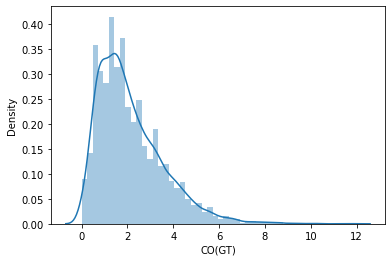

In [11]:
"""
Detecting Outliers with Z-Scores
"""
import seaborn as sns
# Visualize the distribution of the 'CO(GT)' variable
sns.distplot(co)

In [12]:
# Mean, Standard deviation
mean = np.mean(co)
std = np.std(co)
print(mean, std)

2.126146200705357 1.4369815748596482


In [13]:
# Calculate Z-scores for each data points
outliers = []
thres = 3

for i in co:
    z_score = (i-mean) / std
    if (np.abs(z_score) > thres):
        print(z_score)
        outliers.append(i)

3.3221398818289734
3.113368937755246
4.157223658123882
4.087633343432639
3.0437786230640036
3.113368937755246
3.8092720846676698
3.182959252446488
3.113368937755246
3.600501140593942
3.5309108259027
3.0437786230640036
3.0437786230640036
3.182959252446488
3.0437786230640036
3.600501140593942
3.182959252446488
3.7396817699764275
3.0437786230640036
3.182959252446488
3.3917301965202156
4.087633343432639
3.878862399358912
3.2525495671377302
4.36599460219761
3.2525495671377302
4.018043028741397
4.36599460219761
4.087633343432639
4.36599460219761
5.131488063801275
3.0437786230640036
3.113368937755246
3.7396817699764275
3.2525495671377302
4.018043028741397
4.087633343432639
4.922717119727547
3.3917301965202156
3.786075313103922
4.180420429687629
4.574765546271336
4.157223658123882
4.087633343432639
3.113368937755246
3.2525495671377302
3.9484527140501537
5.618620266639971
3.113368937755246
3.7396817699764275
3.5309108259027
4.296404287506367
4.505175231580093
3.3221398818289734
3.04377862306400

In [14]:
# Simplified version of filtering outliers
outliers = co.loc[np.abs((co-mean)/std) > 3]
outliers

Datetime
2004-03-11 19:00:00    6.9
2004-03-12 20:00:00    6.6
2004-03-15 09:00:00    8.1
2004-03-15 19:00:00    8.0
2004-03-15 20:00:00    6.5
                      ... 
2005-03-14 19:00:00    6.5
2005-03-14 20:00:00    6.5
2005-03-15 20:00:00    7.4
2005-03-23 20:00:00    7.2
2005-03-24 20:00:00    7.5
Name: CO(GT), Length: 116, dtype: float64

In [15]:
# Mask for outliers
mask = co.index.isin(outliers.index)
mask[:50]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [34]:
# Comparison of distributions before/after outlier removal
sns.distplot(co, axlabel='CO(GT)', label='original')
sns.distplot(co[~mask], label='outliers removed')
plt.legend(loc='best')

# [exer] Adjust thres

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [16]:
# Flooring and Capping
floor = co.quantile(0.1)
cap = co.quantile(0.9)
co.loc[co < floor] = floor
co.loc[co > cap] = cap

<AxesSubplot:xlabel='Datetime'>

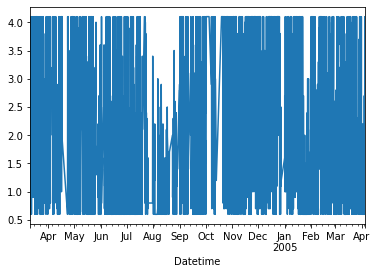

In [17]:
# Visualize the result
co.plot()